# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Solahudin]
- **Email:** [solahslh89@gmail.com]
- **ID Dicoding:** [solah5]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda (casual dan registered) harian?
- Apakah ada perbedaan pola peminjaman sepeda pada jam kerja (working hours) dan jam di luar kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/solah5/submission/refs/heads/main/submission/data/day.csv")
day_df.head()
hour_df = pd.read_csv("https://raw.githubusercontent.com/solah5/submission/refs/heads/main/submission/data/hour.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data day.csv dan hour.csv berhasil di load
- Data yang dikumpulkan mengandung semua aspek yang diperlukan, seperti tanggal, cuaca, dan jumlah peminjaman.

### Assessing Data

In [14]:
# day_df.info()
# hour_df.info()

print("Jumlah duplikat:", day_df.duplicated().sum())
print(day_df.isnull().sum())
print("Jumlah duplikat:", hour_df.duplicated().sum())
print(hour_df.isnull().sum())

Jumlah duplikat: 0
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikat: 0
instant           0
dteday            0
season            0
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
dtedy         16648
dtype: int64


**Insight:**
- Dataset ini relatif bersih, artinya tidak ada nilai yang hilang atau duplikat di dalamnya. Dengan demikian, data siap untuk dianalisis tanpa perlu mengimputasi nilai yang hilang atau menghapus duplikat.
- Tetapi, pada kolom 'dtdey' perlu diperbaiki tipe datanya supaya mudah diolah dan dianalisis berdasarkan waktu.

### Cleaning Data

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dtedy'] = pd.to_datetime(day_df['dteday'])

**Insight:**
- Tipe data kolom 'dteday' pada kedua dataset telah diubah, dan akhirnya data ini bersih.


## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
# Mengelompokkan berdasarkan cuaca dan menemukan rata-rata rental sepeda (casual, registered, and total)
weather_grouped = day_df.groupby('weathersit').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

# Mapping 'weathersit' ke label deskriptif
weather_grouped['weathersit'] = weather_grouped['weathersit'].map({
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice Pellets'
})

print(weather_grouped)

# Define working hours (9 AM to 5 PM)
hour_df['is_working_hour'] = hour_df['hr'].apply(lambda x: 1 if 9 <= x <= 17 else 0)

# Kelompokkan berdasarkan jam kerja untuk menemukan rata-rata rentals
working_hour_grouped = hour_df.groupby('is_working_hour').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

# Map indikator jam kerja ke label
working_hour_grouped['is_working_hour'] = working_hour_grouped['is_working_hour'].map({
    1: 'Working Hours (9-17)',
    0: 'Outside Working Hours'
})

print(working_hour_grouped)

         weathersit      casual   registered          cnt
0  Clear/Few clouds  964.030238  3912.755940  4876.786177
1       Mist/Cloudy  687.352227  3348.510121  4035.862348
2   Light Snow/Rain  185.476190  1617.809524  1803.285714
         is_working_hour     casual  registered         cnt
0  Outside Working Hours  18.507253  125.900213  144.407466
1   Working Hours (9-17)  64.019677  199.823673  263.843350


**Insight:**
- Perilaku orang yang menggunakan sepeda, terutama yang kasual, dipengaruhi oleh cuaca, yaitu mereka lebih sering menggunakannya untuk rekreasi atau transportasi ketika cuaca cerah. Sebaliknya, ketika cuaca memburuk, terutama hujan dan salju, orang lebih sering menghindari menyewa sepeda.
- Pengguna kasual meningkat di luar jam kerja, mungkin karena menggunakan sepeda untuk rekreasi atau aktivitas lain di luar pekerjaan.

## Visualization & Explanatory Analysis

### Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda (casual dan registered) harian?

<ipython-input-18-4b438601d5a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_grouped, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

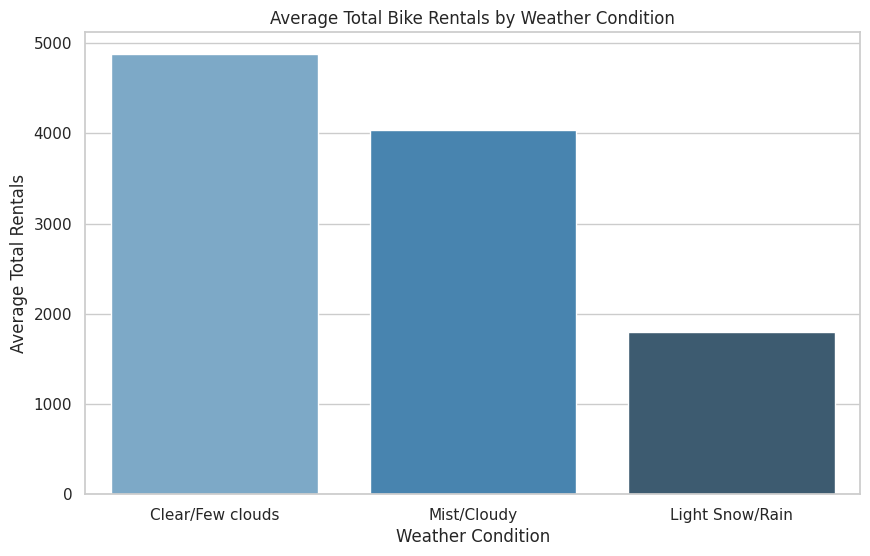

In [18]:
sns.set(style="whitegrid")

# Plotting pengaruh cuaca terhadap total rental
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='cnt', data=weather_grouped, palette='Blues_d')
plt.title('Average Total Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Total Rentals')
plt.show()

### Apakah ada perbedaan pola peminjaman sepeda pada jam kerja (working hours) dan jam di luar kerja?

<ipython-input-27-74f690d3d119>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_working_hour', y='cnt', data=working_hour_grouped, palette='Oranges_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


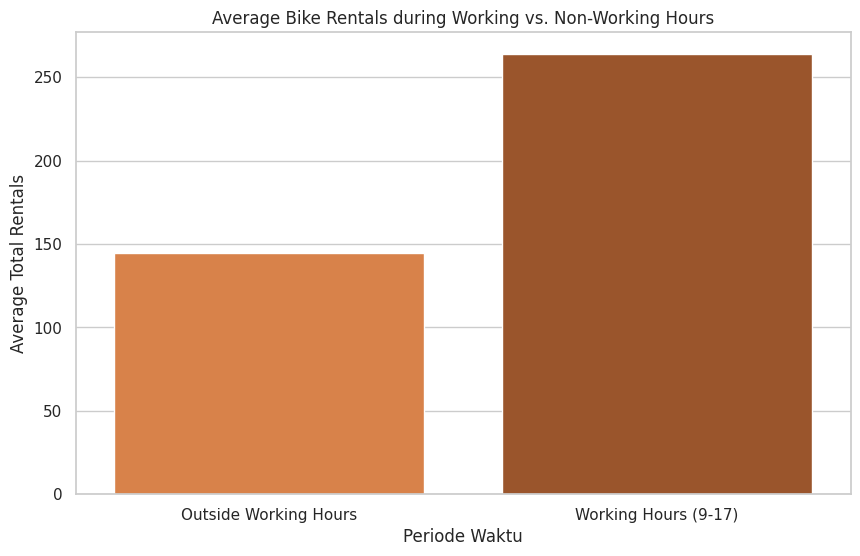

In [27]:
# Plotting perbandingan antara jam kerja dan di luar jam kerja
plt.figure(figsize=(10,6))
sns.barplot(x='is_working_hour', y='cnt', data=working_hour_grouped, palette='Oranges_d')
plt.title('Average Bike Rentals during Working vs. Non-Working Hours')
plt.xlabel('Periode Waktu')
plt.ylabel('Average Total Rentals')
plt.show()

**Insight:**
- Dalam cuaca buruk, manajemen sepeda atau bisnis sewa sepeda dapat menggunakan informasi ini untuk mengantisipasi penurunan permintaan dan meningkatkan promosi pada hari-hari cerah untuk meningkatkan penggunaan.
- Ini menunjukkan kepada penyedia layanan sepeda bahwa, karena permintaan yang meningkat, mereka harus memastikan bahwa sepeda tersedia selama jam kerja. Ini memungkinkan mereka untuk lebih fleksibel dalam mengelola dan memperbaiki sepeda mereka di luar jam kerja.

## Analisis Lanjutan (Opsional)

## Conclusion

- Perilaku peminjaman sepeda sangat dipengaruhi oleh cuaca, karena lebih banyak peminjaman terjadi pada hari yang cerah atau sedikit berawan. Bisnis sepeda dapat meningkatkan layanan mereka dengan memprioritaskan hari-hari dengan cuaca yang baik.
- Pengguna yang terdaftar lebih sering menggunakan sepeda selama jam kerja, yang menunjukkan bahwa banyak dari mereka mungkin menggunakan sepeda sebagai cara utama untuk pergi ke tempat kerja. Pengguna yang lebih sering meminjam sepeda untuk aktivitas rekreasi di luar waktu kerja mereka juga.
